In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("../data/dataset.csv")

In [77]:
# check if there is na/all-0 col in dataframe
data.isna().values.any()

False

In [78]:
(data==0).any(axis=0)

Benchmark                   False
Input Size                  False
Threads                     False
cycles                      False
instructions                False
ins_per_cycle               False
cache_references            False
cache_misses                False
cache_misses_percent        False
branches_instructions       False
branch_misses               False
bus_cycles                  False
ref_cycles                  False
alignment_faults             True
bpf_output                   True
cpu_clock                   False
cpu_migrations               True
dummy                        True
emulation_faults             True
major_faults                 True
minor_faults                False
page_faults                 False
LLC_loads                   False
LLC_load_misses             False
LLC_misses_percent          False
LLC_stores                  False
LLC_store_misses            False
LLC_store_misses_percent    False
time                        False
user_time     

In [79]:
data = data.loc[:,(data!=0).any(axis=0)]

In [80]:
data

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,blackscholes,simsmall,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.000
1,blackscholes,simsmall,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.000
2,blackscholes,simsmall,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.000
3,blackscholes,simsmall,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.000
4,blackscholes,simsmall,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,splash2x.water_spatial,simlarge,12,9462855318,25276476570,2.67,37753463,2369642,6.277,3054819620,...,75014,11366220,730966,6.431039,3437330,414128,12.047956,0.598,4.111,0.014
11996,splash2x.water_spatial,simlarge,13,9386161404,24456013643,2.61,51599998,4376000,8.481,3156313269,...,74702,10915857,549203,5.031240,5702782,1198761,21.020635,0.763,4.094,0.020
11997,splash2x.water_spatial,simlarge,14,9095479482,24743808619,2.72,39899123,2522203,6.321,3121149115,...,75393,12344112,836539,6.776826,4598298,352000,7.655006,0.602,4.057,0.017
11998,splash2x.water_spatial,simlarge,15,9148398466,24052327167,2.63,47573960,2290824,4.815,3064122531,...,75716,9487046,240099,2.530809,7615474,206724,2.714526,0.517,4.067,0.008


In [81]:
data.shape

(12000, 27)

In [82]:
data.columns

Index(['Benchmark', 'Input Size', 'Threads', 'cycles', 'instructions',
       'ins_per_cycle', 'cache_references', 'cache_misses',
       'cache_misses_percent', 'branches_instructions', 'branch_misses',
       'bus_cycles', 'ref_cycles', 'cpu_clock', 'cpu_migrations',
       'major_faults', 'minor_faults', 'page_faults', 'LLC_loads',
       'LLC_load_misses', 'LLC_misses_percent', 'LLC_stores',
       'LLC_store_misses', 'LLC_store_misses_percent', 'time', 'user_time',
       'sys_time'],
      dtype='object')

In [83]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,blackscholes,simsmall,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,blackscholes,simsmall,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,blackscholes,simsmall,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,blackscholes,simsmall,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,blackscholes,simsmall,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [84]:
data.dtypes

Benchmark                    object
Input Size                   object
Threads                       int64
cycles                        int64
instructions                  int64
ins_per_cycle               float64
cache_references              int64
cache_misses                  int64
cache_misses_percent        float64
branches_instructions         int64
branch_misses                 int64
bus_cycles                    int64
ref_cycles                    int64
cpu_clock                   float64
cpu_migrations                int64
major_faults                  int64
minor_faults                  int64
page_faults                   int64
LLC_loads                     int64
LLC_load_misses               int64
LLC_misses_percent          float64
LLC_stores                    int64
LLC_store_misses              int64
LLC_store_misses_percent    float64
time                        float64
user_time                   float64
sys_time                    float64
dtype: object

In [85]:
data.describe()

,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,branch_misses,bus_cycles,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
count,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,8.500000,5.727307e+09,9.859915e+09,1.595872,1.685333e+08,7.030203e+06,5.201414,1.368561e+09,2.114916e+07,2.720756e+08,...,9.685573e+04,3.171914e+07,1.704509e+06,5.813969,9.158729e+06,9.672202e+05,4.728276,0.719336,2.303442,0.170095
std,4.609964,8.256475e+09,1.548821e+10,0.502680,6.255121e+08,3.060518e+07,7.131502,1.960565e+09,3.865963e+07,3.777738e+08,...,1.017851e+05,1.003471e+08,5.048689e+06,8.061491,2.001272e+07,4.042147e+06,8.129125,1.461229,3.531612,0.588309
min,1.000000,4.430309e+08,5.479203e+08,0.510000,8.368830e+06,5.386500e+04,0.003000,1.309339e+08,2.909465e+06,2.450477e+07,...,6.807300e+04,2.398443e+06,1.475900e+04,0.007333,1.027391e+06,5.084000e+03,0.092580,0.002000,0.000000,0.000000
25%,4.750000,6.945940e+08,9.558909e+08,1.230000,1.522629e+07,1.940625e+05,0.982000,2.089169e+08,4.104572e+06,4.082375e+07,...,6.973500e+04,4.003034e+06,5.404850e+04,0.950551,2.317424e+06,2.257475e+04,0.795311,0.098000,0.062000,0.002000
50%,8.500000,1.837113e+09,3.107422e+09,1.430000,2.427978e+07,5.894810e+05,2.029000,4.926237e+08,6.942319e+06,9.621546e+07,...,7.161750e+04,6.287350e+06,1.855800e+05,2.332171,3.835776e+06,5.718850e+04,1.412680,0.190500,0.646000,0.025000
75%,12.250000,7.049128e+09,1.162632e+10,1.860000,5.933671e+07,2.657690e+06,7.190000,1.583072e+09,1.711841e+07,3.329123e+08,...,8.398600e+04,1.744948e+07,7.826198e+05,7.109470,6.898424e+06,2.651640e+05,3.847585,0.595000,3.002250,0.093000
max,16.000000,4.399288e+10,9.605588e+10,3.490000,5.175426e+09,4.047564e+08,53.439000,1.028992e+10,2.703555e+08,2.026865e+09,...,1.192374e+06,1.095928e+09,5.533783e+07,60.684001,3.441865e+08,6.094097e+07,78.495231,15.408000,20.082000,7.065000


In [86]:
benchmark = data['Benchmark'].unique()
input_size = data['Input Size'].unique()

for i in range(len(benchmark)):
    data.replace({benchmark[i]:i},inplace=True)

for i in range(len(input_size)):
    data.replace({input_size[i]:i},inplace=True)

In [87]:
data.dtypes

Benchmark                     int64
Input Size                    int64
Threads                       int64
cycles                        int64
instructions                  int64
ins_per_cycle               float64
cache_references              int64
cache_misses                  int64
cache_misses_percent        float64
branches_instructions         int64
branch_misses                 int64
bus_cycles                    int64
ref_cycles                    int64
cpu_clock                   float64
cpu_migrations                int64
major_faults                  int64
minor_faults                  int64
page_faults                   int64
LLC_loads                     int64
LLC_load_misses               int64
LLC_misses_percent          float64
LLC_stores                    int64
LLC_store_misses              int64
LLC_store_misses_percent    float64
time                        float64
user_time                   float64
sys_time                    float64
dtype: object

In [88]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,0,0,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,0,0,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,0,0,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,0,0,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,0,0,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [89]:
data.describe()

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
count,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,12.000000,1.000000,8.500000,5.727307e+09,9.859915e+09,1.595872,1.685333e+08,7.030203e+06,5.201414,1.368561e+09,...,9.685573e+04,3.171914e+07,1.704509e+06,5.813969,9.158729e+06,9.672202e+05,4.728276,0.719336,2.303442,0.170095
std,7.211403,0.816531,4.609964,8.256475e+09,1.548821e+10,0.502680,6.255121e+08,3.060518e+07,7.131502,1.960565e+09,...,1.017851e+05,1.003471e+08,5.048689e+06,8.061491,2.001272e+07,4.042147e+06,8.129125,1.461229,3.531612,0.588309
min,0.000000,0.000000,1.000000,4.430309e+08,5.479203e+08,0.510000,8.368830e+06,5.386500e+04,0.003000,1.309339e+08,...,6.807300e+04,2.398443e+06,1.475900e+04,0.007333,1.027391e+06,5.084000e+03,0.092580,0.002000,0.000000,0.000000
25%,6.000000,0.000000,4.750000,6.945940e+08,9.558909e+08,1.230000,1.522629e+07,1.940625e+05,0.982000,2.089169e+08,...,6.973500e+04,4.003034e+06,5.404850e+04,0.950551,2.317424e+06,2.257475e+04,0.795311,0.098000,0.062000,0.002000
50%,12.000000,1.000000,8.500000,1.837113e+09,3.107422e+09,1.430000,2.427978e+07,5.894810e+05,2.029000,4.926237e+08,...,7.161750e+04,6.287350e+06,1.855800e+05,2.332171,3.835776e+06,5.718850e+04,1.412680,0.190500,0.646000,0.025000
75%,18.000000,2.000000,12.250000,7.049128e+09,1.162632e+10,1.860000,5.933671e+07,2.657690e+06,7.190000,1.583072e+09,...,8.398600e+04,1.744948e+07,7.826198e+05,7.109470,6.898424e+06,2.651640e+05,3.847585,0.595000,3.002250,0.093000
max,24.000000,2.000000,16.000000,4.399288e+10,9.605588e+10,3.490000,5.175426e+09,4.047564e+08,53.439000,1.028992e+10,...,1.192374e+06,1.095928e+09,5.533783e+07,60.684001,3.441865e+08,6.094097e+07,78.495231,15.408000,20.082000,7.065000


In [90]:
corr = data.corr()

In [91]:
corr

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
Benchmark,1.000000e+00,-8.857386e-17,6.957610e-17,0.057751,0.165292,0.259822,0.220671,0.050724,-0.119703,0.108536,...,-0.109639,0.154407,-0.040561,-0.153232,-0.039803,0.025625,-0.079067,-0.044589,0.073213,-0.088776
Input Size,-8.857386e-17,1.000000e+00,-5.053802e-18,0.550920,0.543447,0.282295,0.238170,0.222733,0.315478,0.543922,...,0.218299,0.259485,0.313778,0.295177,0.291076,0.212674,0.241811,0.387758,0.559697,0.191657
Threads,6.957610e-17,-5.053802e-18,1.000000e+00,0.051153,-0.000629,-0.142431,-0.009844,-0.039462,0.012214,0.017589,...,0.008984,-0.021281,-0.014769,-0.011066,-0.019263,-0.015768,0.040455,-0.214207,0.050528,0.136267
cycles,5.775129e-02,5.509201e-01,5.115253e-02,1.000000,0.908636,0.173432,0.505739,0.347983,0.421368,0.930285,...,0.517703,0.514911,0.543522,0.402212,0.488812,0.359854,0.399897,0.666652,0.992125,0.559078
instructions,1.652923e-01,5.434467e-01,-6.286793e-04,0.908636,1.000000,0.436029,0.432882,0.185572,0.309736,0.959058,...,0.338291,0.350345,0.333785,0.302750,0.281072,0.177811,0.278211,0.594230,0.922375,0.349356
ins_per_cycle,2.598216e-01,2.822947e-01,-1.424307e-01,0.173432,0.436029,1.000000,0.008013,-0.128800,-0.022034,0.368619,...,-0.081320,-0.093086,-0.158542,-0.074657,-0.128216,-0.159972,-0.061592,0.094399,0.205332,-0.130562
cache_references,2.206708e-01,2.381695e-01,-9.843702e-03,0.505739,0.432882,0.008013,1.000000,0.161983,-0.038918,0.433319,...,0.041222,0.930360,0.130418,-0.061940,0.186523,0.157325,0.028591,0.293330,0.536526,0.028540
cache_misses,5.072351e-02,2.227329e-01,-3.946168e-02,0.347983,0.185572,-0.128800,0.161983,1.000000,0.553126,0.156533,...,0.389149,0.349596,0.887804,0.437528,0.793387,0.919274,0.482235,0.378008,0.334781,0.246031
cache_misses_percent,-1.197032e-01,3.154777e-01,1.221401e-02,0.421368,0.309736,-0.022034,-0.038918,0.553126,1.000000,0.382849,...,0.423350,0.041369,0.700136,0.906200,0.418040,0.549915,0.801775,0.467107,0.402412,0.327607
branches_instructions,1.085361e-01,5.439217e-01,1.758940e-02,0.930285,0.959058,0.368619,0.433319,0.156533,0.382849,1.000000,...,0.417652,0.370803,0.375644,0.383055,0.298926,0.164887,0.323233,0.630861,0.932414,0.445655


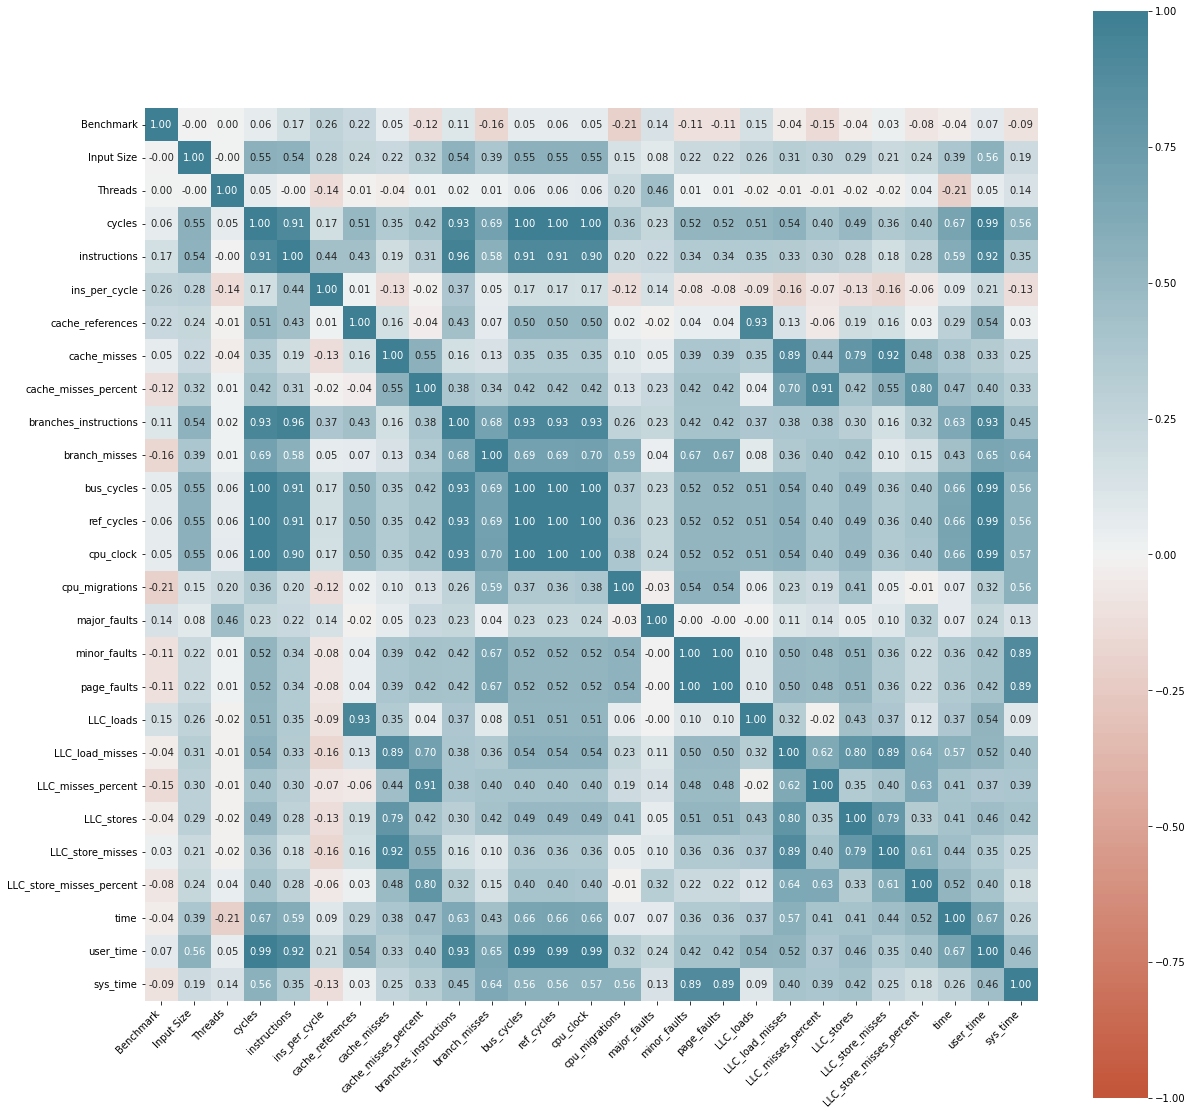

In [92]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".2f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [93]:
unstack_corr = corr.unstack()

In [94]:
unstack_corr

Benchmark  Benchmark                   1.000000e+00
           Input Size                 -8.857386e-17
           Threads                     6.957610e-17
           cycles                      5.775129e-02
           instructions                1.652923e-01
                                           ...     
sys_time   LLC_store_misses            2.457074e-01
           LLC_store_misses_percent    1.818091e-01
           time                        2.635977e-01
           user_time                   4.555776e-01
           sys_time                    1.000000e+00
Length: 729, dtype: float64

In [95]:
output = ['time','user_time','sys_time']
lst = []

for i in output:
    print(i+' correlation')
    corr_table = unstack_corr[abs(unstack_corr)>0.5][i].drop(output, errors='ignore')
    lst = *lst,*corr_table.index
    print(corr_table)
    print('\n')

print('correlated variables')
print(set(lst))

time correlation
cycles                      0.666652
instructions                0.594230
branches_instructions       0.630861
bus_cycles                  0.663755
ref_cycles                  0.664604
cpu_clock                   0.659817
LLC_load_misses             0.570443
LLC_store_misses_percent    0.521399
dtype: float64


user_time correlation
Input Size               0.559697
cycles                   0.992125
instructions             0.922375
cache_references         0.536526
branches_instructions    0.932414
branch_misses            0.648464
bus_cycles               0.991954
ref_cycles               0.991966
cpu_clock                0.991253
LLC_loads                0.538826
LLC_load_misses          0.523599
dtype: float64


sys_time correlation
cycles            0.559078
branch_misses     0.637518
bus_cycles        0.562488
ref_cycles        0.561763
cpu_clock         0.568215
cpu_migrations    0.564667
minor_faults      0.888645
page_faults       0.888649
dtype: float64


cor

In [96]:
new_data = data[[*set(lst),*output]]

In [97]:
new_data

,LLC_loads,page_faults,Input Size,cpu_migrations,LLC_load_misses,cache_references,cycles,instructions,bus_cycles,ref_cycles,LLC_store_misses_percent,minor_faults,cpu_clock,branch_misses,branches_instructions,time,user_time,sys_time
0,3586395,69534,0,7,67890,13221057,521324755,668243892,35970429,818766563,1.620721,69534,574.21,3953952,174052847,0.045,0.045,0.000
1,3756986,69530,0,14,83124,13201504,604087463,745514225,37409896,841124296,2.426791,69530,577.19,3571920,179328504,0.028,0.045,0.000
2,3291078,69493,0,9,25693,14204116,540727036,676803235,34805980,812634023,0.650713,69493,568.43,3778572,177831187,0.023,0.045,0.000
3,3594115,70120,0,12,79537,13690247,568738331,689568815,35174945,821102519,1.131704,70120,576.27,3799148,155514994,0.021,0.046,0.000
4,3211251,69519,0,7,54678,12650468,506534749,642433245,32651255,747611320,0.411899,69519,568.37,3605267,149658203,0.018,0.045,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11366220,75014,2,23,730966,37753463,9462855318,25276476570,435133102,9465961576,12.047956,75006,4658.76,18266225,3054819620,0.598,4.111,0.014
11996,10915857,74702,2,14,549203,51599998,9386161404,24456013643,426478043,9412081240,21.020635,74693,4644.05,17411128,3156313269,0.763,4.094,0.020
11997,12344112,75393,2,14,836539,39899123,9095479482,24743808619,430453243,9406800176,7.655006,75386,4597.57,16900012,3121149115,0.602,4.057,0.017
11998,9487046,75716,2,17,240099,47573960,9148398466,24052327167,425915057,9248816010,2.714526,75708,4603.32,16092321,3064122531,0.517,4.067,0.008


In [98]:
new_data.shape

(12000, 18)

In [99]:
new_data.to_csv('../data/prepocessed_data.csv',index=False)